# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [243]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [244]:
# Checking the number of mice.

len(merge_df["Mouse ID"].unique())


249

In [245]:
# Get list of duplicate rows based on list of column names
duplicate_mouse_ids=merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids





array(['g989'], dtype=object)

In [246]:
duplicate_mouse_data=merge_df.loc[merge_df["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [247]:
clean_study_data_complete=merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [248]:
#clean_study_data_complete.copy()
#clean_study_data_complete.drop_duplicates(subset=['Mouse ID'],keep='first',inplace=True)
#clean_study_data_complete


In [249]:
# Checking the number of mice in the clean DataFrame.
unique = len(pd.unique(clean_study_data_complete["Mouse ID"]))
unique

248

## Summary Statistics

In [250]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
means=clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances=clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds=clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems=clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_table=pd.DataFrame({"Mean Tumor Value":means,
                           "Median Tumor Value":median,
                            "Tumor Volume Variance":variances,
                             "Tumor Volume Std.Dev.":sds,
                               "Tumor Volume Std.Err.":sems})
summary_table



,Mean Tumor Value,Median Tumor Value,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [251]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table=clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [252]:
sum=clean_study_data_complete.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
summary_table=pd.DataFrame({"Timepoint":sum})
summary_table

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


In [253]:
Drug_Regimen=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]
Timepoint=[230,228,188,186,182,181,181,178,178,148]




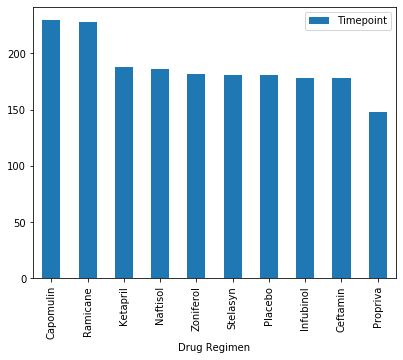

<Figure size 432x288 with 0 Axes>

In [254]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
summary_table.plot(kind="bar", figsize=(6.5,5))

plt.show()
plt.tight_layout()

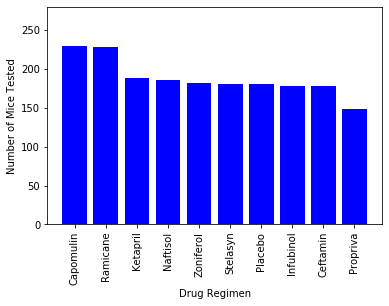

In [255]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=np.arange(len(Timepoint))

plt.bar(x_axis, Timepoint, color='b',align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen,rotation="vertical")
plt.ylim(0, max(Timepoint)+50)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
summary_table_sorted=summary_table.sort_values('Drug Regimen',ascending=False)
summary_table_sorted
plt.show()

In [256]:
# the distribution of female versus male mice in the study.
df1=clean_study_data_complete.groupby(['Sex']).count().sort_values('Sex',ascending=False)
df1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Male,958,958,958,958,958,958,958
Female,922,922,922,922,922,922,922


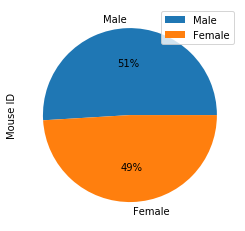

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df1=clean_study_data_complete.groupby(['Sex']).count().sort_values('Sex',ascending=False).plot(kind='pie', y='Mouse ID', autopct='%1.0f%%')





([<matplotlib.patches.Wedge at 0x7fe0407a18d0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

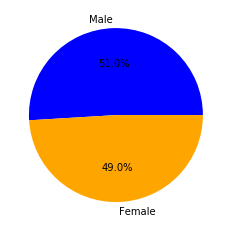

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
labels=["Male","Female"]
sizes=[958,922]
colors=["blue","orange"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [259]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint=clean_study_data_complete.groupby('Mouse ID')['Timepoint'].max()
dflastpoint=pd.DataFrame({"Timepoint":last_timepoint})
dflastpoint





,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [260]:
merge_df1 = pd.merge(dflastpoint, clean_study_data_complete, on=["Mouse ID","Timepoint"],how="inner")
merge_df1=merge_df1.reset_index()
merge_df1



,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.973419,2,Infubinol,Female,20,23
1,1,a251,45,65.525743,1,Infubinol,Female,21,25
2,2,a262,45,70.717621,4,Placebo,Female,17,29
3,3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
243,243,z435,10,48.710661,0,Propriva,Female,12,26
244,244,z578,45,30.638696,0,Ramicane,Male,11,16
245,245,z581,45,62.754451,3,Infubinol,Female,24,25
246,246,z795,45,65.741070,3,Naftisol,Female,13,29


In [261]:
 #a list to save all four filtered data
# filtered and find the important column
filtered_data_Capomulin = merge_df1.loc[ merge_df1["Drug Regimen"] == "Capomulin"]
filtered_data_Capomulin=filtered_data_Capomulin[['Drug Regimen','Tumor Volume (mm3)']]
tumor_volume_list = filtered_data_Capomulin["Tumor Volume (mm3)"].values.tolist()
print(tumor_volume_list)
filtered_data_Capomulin
  

[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.125164399999996, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.896238399999998]


,Drug Regimen,Tumor Volume (mm3)
19,Capomulin,38.982878
24,Capomulin,38.939633
61,Capomulin,30.485985
64,Capomulin,37.074024
66,Capomulin,40.159220
80,Capomulin,47.685963
83,Capomulin,37.311846
85,Capomulin,38.125164
87,Capomulin,38.753265
108,Capomulin,41.483008


In [262]:
filtered_data_Ramicane= merge_df1.loc[ merge_df1["Drug Regimen"] == "Ramicane"]
filtered_data_Ramicane=filtered_data_Ramicane[['Drug Regimen','Tumor Volume (mm3)']]
tumor_volume_list1 = filtered_data_Ramicane["Tumor Volume (mm3)"].values.tolist()
print(tumor_volume_list1)
filtered_data_Ramicane

[38.407618299999996, 43.04754260000001, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]


,Drug Regimen,Tumor Volume (mm3)
6,Ramicane,38.407618
7,Ramicane,43.047543
10,Ramicane,38.810366
12,Ramicane,32.978522
33,Ramicane,38.342008
37,Ramicane,33.397653
45,Ramicane,37.311236
52,Ramicane,40.659006
70,Ramicane,29.128472
76,Ramicane,33.562402


In [263]:
filtered_data_Infubinol = merge_df1.loc[ merge_df1["Drug Regimen"] == "Infubinol"]
filtered_data_Infubinol=filtered_data_Infubinol[['Drug Regimen','Tumor Volume (mm3)']]
tumor_volume_list2 = filtered_data_Infubinol["Tumor Volume (mm3)"].values.tolist()
print(tumor_volume_list2)
filtered_data_Infubinol

[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]


,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
11,Infubinol,57.031862
13,Infubinol,66.083066
27,Infubinol,72.226731
31,Infubinol,36.321346
41,Infubinol,60.969711
50,Infubinol,62.435404
56,Infubinol,60.918767
78,Infubinol,67.289621


In [264]:
filtered_data_Ceftamin = merge_df1.loc[ merge_df1["Drug Regimen"] == "Ceftamin"]
filtered_data_Ceftamin=filtered_data_Ceftamin[['Drug Regimen','Tumor Volume (mm3)']]
tumor_volume_list3 = filtered_data_Ceftamin["Tumor Volume (mm3)"].values.tolist()
print(tumor_volume_list3)
filtered_data_Ceftamin

[62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.784681799999994, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]


,Drug Regimen,Tumor Volume (mm3)
3,Ceftamin,62.999356
21,Ceftamin,45.000000
22,Ceftamin,56.057749
25,Ceftamin,55.742829
58,Ceftamin,48.722078
75,Ceftamin,47.784682
88,Ceftamin,61.849023
94,Ceftamin,68.923185
106,Ceftamin,67.748662
107,Ceftamin,57.918381


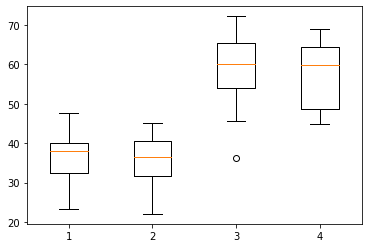

In [265]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels=['Capomulin','Ramicane','Infubonil','Caftamin']
plt.boxplot([tumor_volume_list,tumor_volume_list1,tumor_volume_list2,tumor_volume_list3])

plt.show()

In [266]:

quartiles = filtered_data_Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles1 = filtered_data_Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles2 = filtered_data_Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles3 = filtered_data_Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])


lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f" Capomulin's potential outliers is: {lowerq}",quartiles[0.5])
print(f" Ramicane's potential outliers is: {lowerq}",quartiles1[0.5])
print(f" Infubinol's potential outliers is: {lowerq}",quartiles2[0.5])
print(f" Ceftamin's potential outliers is: {lowerq}",quartiles3[0.5])



 Capomulin's potential outliers is: 32.37735684 38.125164399999996
 Ramicane's potential outliers is: 32.37735684 36.56165229
 Infubinol's potential outliers is: 32.37735684 60.16518046
 Ceftamin's potential outliers is: 32.37735684 59.85195552


## Line and Scatter Plots

In [267]:
# Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.

filtered_data_Capomulin = merge_df.loc[ merge_df["Drug Regimen"] == "Capomulin"]
Timepoint_Cap=filtered_data_Capomulin.loc[filtered_data_Capomulin["Mouse ID"]=="b128"]
Timepoint_Cap=Timepoint_Cap[['Tumor Volume (mm3)','Timepoint']]
mouseid_tumorlist = Timepoint_Cap["Tumor Volume (mm3)"].values.tolist()
mouseid_timepointlist = Timepoint_Cap["Timepoint"].values.tolist()
print(mouseid_tumorlist)
print(mouseid_timepointlist)
Timepoint_Cap


  


[45.0, 45.65133131, 43.2708519, 43.78489343, 42.731552, 43.26214483, 40.60533486, 37.96764437, 38.3797259, 38.98287774]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


,Tumor Volume (mm3),Timepoint
0,45.000000,0
1,45.651331,5
2,43.270852,10
3,43.784893,15
4,42.731552,20
5,43.262145,25
6,40.605335,30
7,37.967644,35
8,38.379726,40
9,38.982878,45


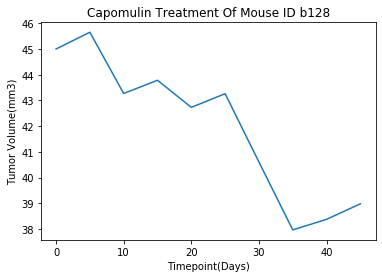

In [268]:
plt.plot(mouseid_timepointlist, mouseid_tumorlist)
plt.title("Capomulin Treatment Of Mouse ID b128")
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()

In [276]:
#Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.

filtered_data_Capomulin = merge_df.loc[ merge_df["Drug Regimen"] == "Capomulin"]
filtered_data_Capomulin1=filtered_data_Capomulin.groupby(["Mouse ID","Weight (g)"])["Weight (g)","Tumor Volume (mm3)"].mean()
filtered_data_Capomulin1 = pd.DataFrame(filtered_data_Capomulin1)
print(filtered_data_Capomulin1.columns.tolist())
filtered_data_Capomulin1['Weight (g)'] = pd.to_numeric(filtered_data_Capomulin1['Weight (g)'])
filtered_data_Capomulin1


['Weight (g)', 'Tumor Volume (mm3)']


/Users/nikitajain/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,,Weight (g),Tumor Volume (mm3)
Mouse ID,Weight (g),,
b128,22,22,41.963636
b742,21,21,40.083699
f966,17,17,36.505973
g288,19,19,41.990097
g316,22,22,44.613344
i557,24,24,44.805810
i738,20,20,39.141053
j119,23,23,44.465236
j246,21,21,43.216925


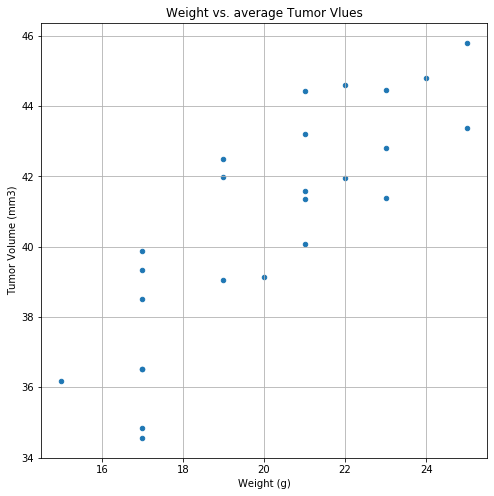

In [271]:
filtered_data_Capomulin1.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Weight vs. average Tumor Vlues")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


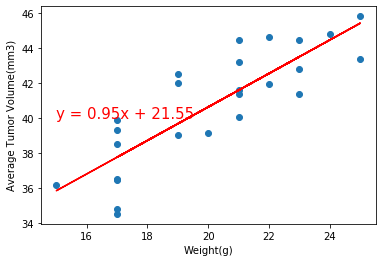

In [272]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Weight = filtered_data_Capomulin1.iloc[:,0]
TumorVolume= filtered_data_Capomulin1.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, TumorVolume)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Weight,TumorVolume)
plt.plot(Weight,regress_values,"r-")
plt.annotate(line_eq,(15,40),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
correlation = st.pearsonr(Weight,TumorVolume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()
